winter lecture 10 pdf

Vanilla Neural Networks (one to one)-> 기본적인 신경망 구조

one to many   -->  many to many   :rnn구조

one to many : 하나로 입력 ->여러개 출력
many to one : 여러개 입력 ->하나 출력 (긍정 또는 부정의 분류 문제에 사용 예) 영화 평가)
결과 가장 오른쪽에서 출력

many to many: 입력 여러개 ->출력 여러개 (예 ) 번역기 )

rnn은 시간이 가미된 기법이다

rnn에서는 초록박스 히든계층이 아니라  rnn cell이라고 부른다.

주식 예측 -> many to one
여기서 many는3일 전, 2일 전, 하루 전 데이터가 옴
좌에서 우로 시간의 흐름에 따라 발생되는 데이터들을 입력함
->오늘의 종가 예측



 Image Captioning
image -> sequence of words
(이미지 입력하면 이미지에 대한 설명 출력)


Sentiment Classification
sequence of words -> sentiment
(감성분석)
many to one -> sigmoid 사용



Machine Translation
seq of words -> seq of words
(번역기)



RNN은 지금 허접해서 안쓴다.

RNN특징 이해 필요해서 배우는 것


many to many
Video classification on frame level
비디오 분류 (비디오도 여러 연속적인 이미지들의 모임이기 때문에)
비디오는 이미지보다 차원이 한 차원 높다


15p

old state ->이전 셀에서의 rnn 상태값
t->현재시점




그림에서 주가예측

x(input)에는 미국주가,유가,환율,투자자 심리,뉴스...등등 고차원 데이터가 들어감
여기서 가중치w는 매우 클 것이다 
->ht

RNN (ht-1) -> w 다양한 정보 축약된 값 ->ht

=>오늘의 종가 y



과거의 정보들 순서대로 들어가서 오늘의 정보 예측

output y 를 F.C(fully connected) 함




17p

Character-level
language model
example

문자 수준 언어 모델

Vocabulary : 코퍼스를 구성하는 전체 단어들의 집합
ex)의료 코퍼스 :수술,집도,주사,약물...
   법률 코퍼스 : 재판, 피의자 ...
   
   
Vocabulary:
[h,e,l,o]
 ->문자 4개로 구성된 코퍼스
 
 
input layer ->4차원 (Vocabulary가 문자   4개로 구성된 코퍼스이기 때문에)


W_xh 가중치변수 ->값이 다 같다.

W_hh ->이것도 공유

[1,4] 에서 [3,1] 이 나오려면
행렬 연산

[4,1] [?] =[3,1]

hidden layer(ht)의 차원은 직접 정하는 것이다.

이전 상태들의 값들이 일부 hidden layer의 수치에 반영되어있다

출력데이터의 차원이 4차원




https://colah.github.io/posts/2015-08-Understanding-LSTMs/

The Problem of Long-Term Dependencies

시간이 지날수록 정보가 손실됨

“I grew up in France… I speak fluent French.” Recent information suggests that the next word is probably the name of a language, but if we want to narrow down which language, we need the context of France, from further back. It’s entirely possible for the gap between the relevant information and the point where it is needed to become very large.

Unfortunately, as that gap grows, RNNs become unable to learn to connect the information.

->장기 의존성의 문제 피할 수 없음




LSTM 그림 참고

RNN의 단점 보완함
뒤에서 기억해야 할 정보는 취하고 필요 없는 정보는 버리는 방식

The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.
(cell state 선이 하나 더 추가됨.모든 셀들을 연결하는 선)


여러개의 게이트가 있다.
The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

필요 없는 것은 제거, 필요한 것은 계속 전달되도록 함 또는 정보 추가

Gates are a way to optionally let information through.



The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero means “let nothing through,” while a value of one means “let everything through!”

시그모이드 함수 사용->전달되는 정보의 양을 조절해주는 역할을 함. 매우 중요한 역할


Step-by-Step LSTM Walk Through

This decision is made by a sigmoid layer called the “forget gate layer.” 망각게이트

ct-1에는 앞쪽의 셀에 대한 모든 상태정보가 전달됨
시그모이드를 취하면 0~1이 나오는데 이걸 ct-1와 곱한다

예를 들어 값이 0.1이라면 뒤의 정보를 10%만 전달하겠다는 것이고 1이라면 뒤의 정보를 전부 전달하겠다는 것
시그모이드 값이 0이면 앞쪽에 전달된 값들을 모두 제거하는 것

예)
Let’s go back to our example of a language model trying to predict the next word based on all the previous ones. In such a problem, the cell state might include the gender of the present subject, so that the correct pronouns can be used. When we see a new subject, we want to forget the gender of the old subject.





input gate layer
새로 입력되는 셀에 정보를 어느정도 저장할 것인가

 First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, C~t
, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.




In [1]:
#LSTM 이용하여 주가 예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
import FinanceDataReader as fdr

https://finance.yahoo.com/quote/035720.KS?p=035720.KS&.tsrc=fin-srch

In [5]:
kakao=fdr.DataReader('035720') #kakao 종목 정보


In [6]:
kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266
2023-11-03,39250,41550,38900,41300,3675484,0.071336


In [7]:
fdr.DataReader('AAPL')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800


In [8]:
fdr.DataReader('AAPL','1981-01-01','1982-10-31') #기간 조정

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119340,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.116746,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.111556,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.104639,39827200
...,...,...,...,...,...,...
1982-10-25,0.115513,0.116071,0.108259,0.108817,0.084316,184934400
1982-10-26,0.108817,0.109933,0.103795,0.109375,0.084748,167753600
1982-10-27,0.109375,0.112723,0.109375,0.112165,0.086910,191161600


https://github.com/FinanceData/FinanceDataReader

In [9]:
fdr.DataReader('BTC/KRW')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,4.826118e+05,4.838110e+05,4.681210e+05,4.732035e+05,4.732035e+05,21787470960
2014-09-18,4.727130e+05,4.762765e+05,4.309914e+05,4.428182e+05,4.428182e+05,35976322560
2014-09-19,4.424667e+05,4.475154e+05,4.012784e+05,4.119893e+05,4.119893e+05,39571102935
2014-09-20,4.118610e+05,4.417305e+05,4.068624e+05,4.267118e+05,4.267118e+05,38469009780
2014-09-21,4.258571e+05,4.303872e+05,4.103040e+05,4.161897e+05,4.161897e+05,27737663355
...,...,...,...,...,...,...
2023-11-03,4.778487e+07,4.818440e+07,4.589860e+07,4.661862e+07,4.661862e+07,28018157917905
2023-11-04,4.662427e+07,4.662427e+07,4.500898e+07,4.546514e+07,4.546514e+07,22460677199165
2023-11-05,4.547037e+07,4.615068e+07,4.531377e+07,4.592312e+07,4.592312e+07,12515877610681


In [283]:
kakao.index

DatetimeIndex(['1999-11-11', '1999-11-12', '1999-11-15', '1999-11-16',
               '1999-11-17', '1999-11-18', '1999-11-19', '1999-11-22',
               '1999-11-23', '1999-11-24',
               ...
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
               '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03',
               '2023-11-06', '2023-11-07'],
              dtype='datetime64[ns]', name='Date', length=5921, freq=None)

In [284]:
kakao['year']=kakao.index.year

In [285]:
kakao['month']=kakao.index.month

In [286]:
kakao['day']=kakao.index.day

In [287]:
kakao

,Open,High,Low,Close,Volume,Change,year,month,day
Date,,,,,,,,,
1999-11-11,999,999,999,999,12,NaN,1999,11,11
1999-11-12,1115,1115,1115,1115,140,0.116116,1999,11,12
1999-11-15,1249,1249,1249,1249,405,0.120179,1999,11,15
1999-11-16,1396,1396,1396,1396,214,0.117694,1999,11,16
1999-11-17,1561,1561,1561,1561,191,0.118195,1999,11,17
...,...,...,...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291,2023,11,1
2023-11-02,38000,38600,37900,38550,1529650,0.025266,2023,11,2
2023-11-03,39250,41550,38900,41300,3675484,0.071336,2023,11,3


Text(0, 0.5, 'price')

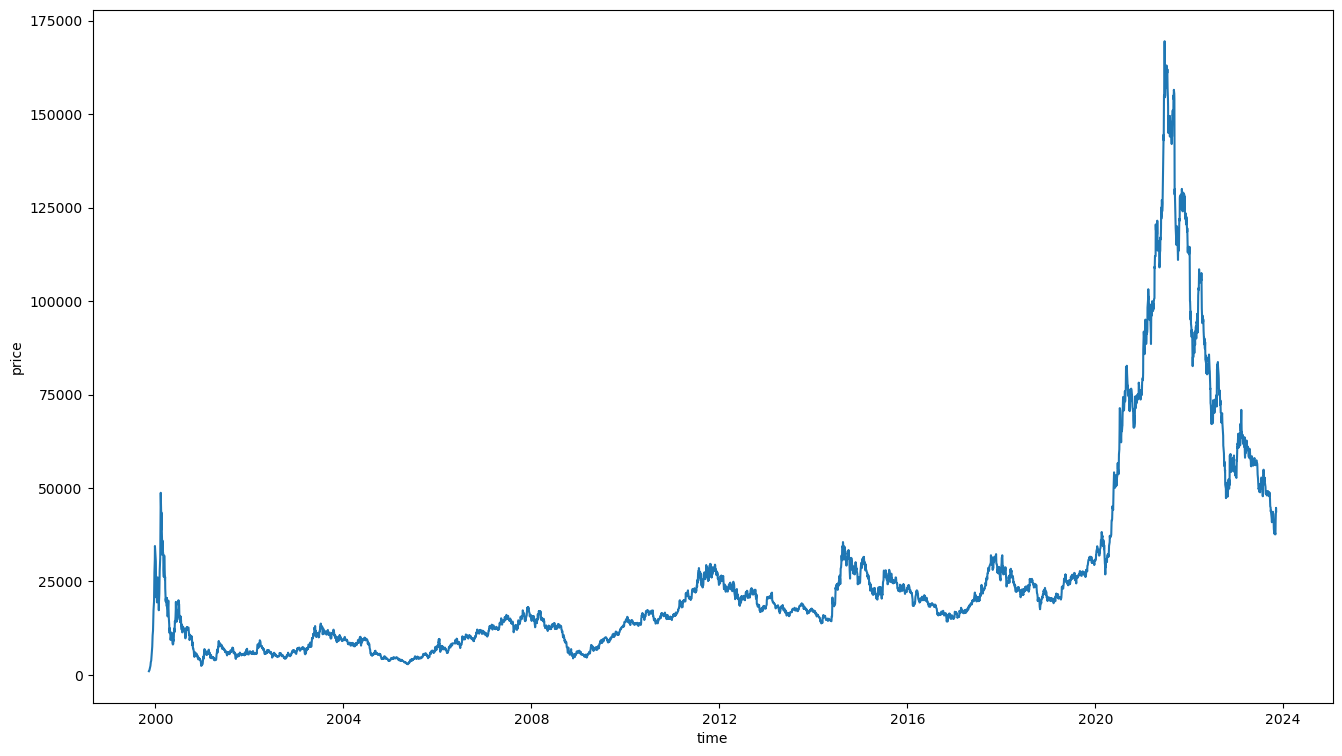

In [288]:
plt.figure(figsize=(16,9))
sns.lineplot(y=kakao['Close'], x=kakao.index)
plt.xlabel('time')
plt.ylabel('price')

In [289]:
ts=[['2000', '2010'],
    ['2010', '2015'],
    ['2015', '2020'],
    ['2020', '2023']]

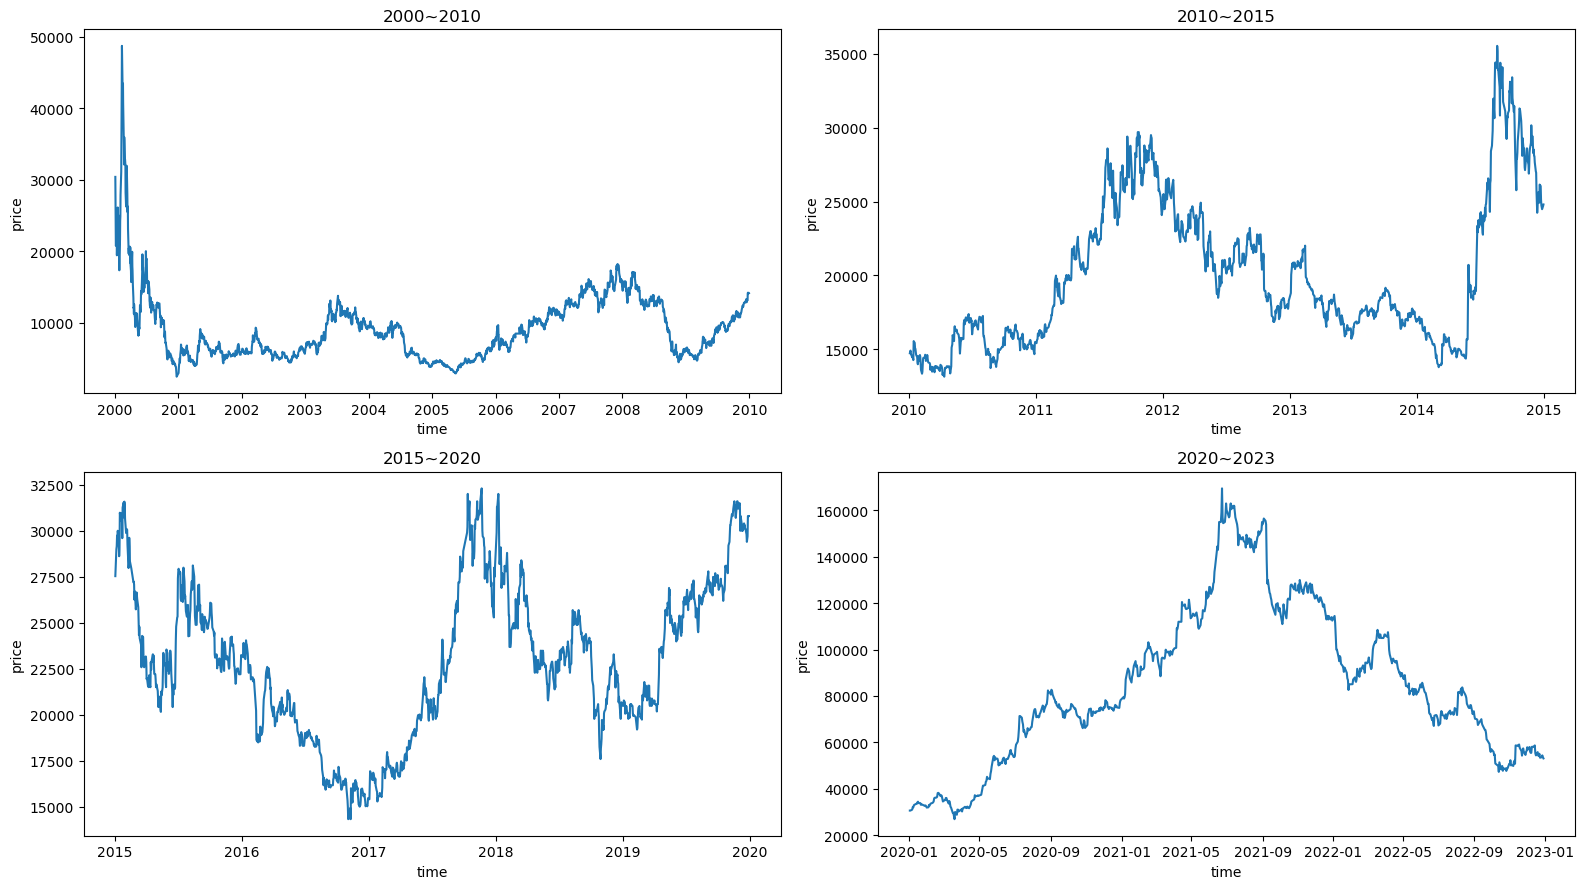

In [290]:
fig,axes=plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2] #축
    df = kakao.loc[(kakao.index > ts[i][0]) & (kakao.index <ts[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{ts[i][0]}~{ts[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout() #그래프 간의 간격 생기게 설정(가독성 높이기)

close (종가) 예측하기
종가에 영향을 주는 열들만 추출해야함

각각의 열들을 x1~라고 생각
각각 w가 곱해질 것
정규화 또는 표준화 필요.아니면 값이 큰 열의 영향을 많이 받게 될 것이다


어느 기간동안의 데이터의 변화를 담을 것인가 직접 정해야함


In [291]:
from sklearn.preprocessing import MinMaxScaler

In [292]:
scaler = MinMaxScaler()

In [293]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [294]:
scaled=scaler.fit_transform(kakao[cols])
scaled

array([[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 0.00000000e+00,
        6.35083673e-07],
       [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 6.88423214e-04,
        7.40930952e-06],
       [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 1.48367072e-03,
        2.14340740e-05],
       ...,
       [2.28197674e-01, 2.40173410e-01, 2.41614907e-01, 2.39173655e-01,
        1.94519990e-01],
       [2.50000000e-01, 2.58381503e-01, 2.62732919e-01, 2.59351577e-01,
        2.57792688e-01],
       [2.59883721e-01, 2.58670520e-01, 2.66149068e-01, 2.53713628e-01,
        1.06856427e-01]])

In [295]:
df=pd.DataFrame(scaled,columns=cols)
df

,Open,High,Low,Close,Volume
0,0.005808,0.005775,0.006205,0.000000,6.350837e-07
1,0.006483,0.006445,0.006925,0.000688,7.409310e-06
2,0.007262,0.007220,0.007758,0.001484,2.143407e-05
3,0.008116,0.008069,0.008671,0.002356,1.132566e-05
4,0.009076,0.009023,0.009696,0.003335,1.010842e-05
...,...,...,...,...,...
5916,0.220930,0.221387,0.232609,0.217215,6.732379e-02
5917,0.220930,0.223121,0.235404,0.222853,8.095465e-02
5918,0.228198,0.240173,0.241615,0.239174,1.945200e-01
5919,0.250000,0.258382,0.262733,0.259352,2.577927e-01


트레인과 테스트데이터(성능평가)로 만들기

In [309]:
from sklearn.model_selection import train_test_split

In [310]:
xtrain, xtest, ytrain, ytest=train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False )
#train_test_split(x데이터,y데이터), shuffle=False ->시간의 흐름이므로 True로 하면 안됨

C:\Users\user\AppData\Local\Temp\ipykernel_1860\1635989705.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xtrain, xtest, ytrain, ytest=train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False )


In [311]:
xtrain.shape

(4736, 4)

In [312]:
xtest.shape

(1185, 4)

In [313]:
ytrain.shape

(4736,)

In [314]:
ytest.shape

(1185,)

lstm구조로 어떻게 예측? 

3개로 나눈다->window



예측값이 나오면 실제값과 비교하여 back propagation하면서 가중치를 조절
window를 적절하게 설정 해야함


먼저 window크기를 정해놓고 그에따라 데이터 나누기


In [315]:
df

,Open,High,Low,Close,Volume
0,0.005808,0.005775,0.006205,0.000000,6.350837e-07
1,0.006483,0.006445,0.006925,0.000688,7.409310e-06
2,0.007262,0.007220,0.007758,0.001484,2.143407e-05
3,0.008116,0.008069,0.008671,0.002356,1.132566e-05
4,0.009076,0.009023,0.009696,0.003335,1.010842e-05
...,...,...,...,...,...
5916,0.220930,0.221387,0.232609,0.217215,6.732379e-02
5917,0.220930,0.223121,0.235404,0.222853,8.095465e-02
5918,0.228198,0.240173,0.241615,0.239174,1.945200e-01
5919,0.250000,0.258382,0.262733,0.259352,2.577927e-01


In [316]:
#xtrain data :4736건
#test data: 1185건

In [317]:
list(np.array(xtrain.iloc[0:4715]))

[array([5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 6.35083673e-07]),
 array([6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06]),
 array([7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05]),
 array([8.11627907e-03, 8.06936416e-03, 8.67080745e-03, 1.13256588e-05]),
 array([9.07558140e-03, 9.02312139e-03, 9.69565217e-03, 1.01084151e-05]),
 array([1.01627907e-02, 1.01040462e-02, 1.08571429e-02, 4.08570497e-05]),
 array([1.13837209e-02, 1.13179191e-02, 1.21614907e-02, 1.33896808e-05]),
 array([1.27325581e-02, 1.26589595e-02, 1.36024845e-02, 1.05318042e-05]),
 array([1.42383721e-02, 1.41560694e-02, 1.52111801e-02, 6.29791309e-06]),
 array([1.59244186e-02, 1.58323699e-02, 1.70124224e-02, 1.19607425e-05]),
 array([1.78197674e-02, 1.77167630e-02, 1.90372671e-02, 3.91634932e-06]),
 array([1.99418605e-02, 1.98265896e-02, 2.13043478e-02, 7.30346224e-06]),
 array([2.23313953e-02, 2.22023121e-02, 2.38571429e-02, 3.82108677e-05]),
 array([2.50000000e-02, 2.48554913e-02

In [318]:
range(4715)

range(0, 4715)

In [319]:
def make_dataset(data, label, window_size=20):
    #print(data.shape) #(4736, 4)
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): #4736-20 =4716 => i = 0 ,4715
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [320]:
make_dataset(xtrain, ytrain, 20)

(array([[[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 6.35083673e-07],
         [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
         [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
         ...,
         [3.92151163e-02, 3.89884393e-02, 4.18944099e-02, 1.20612974e-04],
         [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
         [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05]],
 
        [[6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
         [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
         [8.11627907e-03, 8.06936416e-03, 8.67080745e-03, 1.13256588e-05],
         ...,
         [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
         [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05],
         [5.49883721e-02, 5.46705202e-02, 5.87453416e-02, 1.60358628e-05]],
 
        [[7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.143407

In [321]:
xtrain, ytrain = make_dataset(xtrain, ytrain, 20)

In [322]:
ytrain

array([0.05020148, 0.05681865, 0.06423701, ..., 0.11306758, 0.11318627,
       0.11139993])

In [306]:
xtrain

array([[[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 6.35083673e-07],
        [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        ...,
        [3.92151163e-02, 3.89884393e-02, 4.18944099e-02, 1.20612974e-04],
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05]],

       [[6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        [8.11627907e-03, 8.06936416e-03, 8.67080745e-03, 1.13256588e-05],
        ...,
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05],
        [5.49883721e-02, 5.46705202e-02, 5.87453416e-02, 1.60358628e-05]],

       [[7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        

In [273]:
xtrain.shape

(3772, 20, 4)

In [274]:
xtrain

array([[[0.03112209, 0.03186705, 0.03324845, 0.01652128],
        [0.03163953, 0.03321387, 0.03380124, 0.03462148],
        [0.03351163, 0.03393642, 0.03468944, 0.03820298],
        ...,
        [0.03330233, 0.0336763 , 0.03474534, 0.03874185],
        [0.03402907, 0.0347052 , 0.03568944, 0.03218609],
        [0.03444186, 0.0347052 , 0.03645963, 0.02389296]],

       [[0.07573256, 0.07715029, 0.08065217, 0.00485511],
        [0.0778314 , 0.07772832, 0.08165217, 0.00316743],
        [0.07712791, 0.07726012, 0.07915528, 0.00833897],
        ...,
        [0.08319767, 0.08410983, 0.08788199, 0.00519403],
        [0.08401744, 0.08387861, 0.08801242, 0.00372567],
        [0.08401163, 0.08572832, 0.08813043, 0.00703715]],

       [[0.15053488, 0.15604624, 0.15895031, 0.01669571],
        [0.1545    , 0.15835838, 0.16331056, 0.01048428],
        [0.15520349, 0.15987283, 0.16206832, 0.01025126],
        ...,
        [0.16115116, 0.16613873, 0.1691677 , 0.0036493 ],
        [0.16686628, 0.172052

array([[[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 6.35083673e-07],
        [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        ...,
        [3.92151163e-02, 3.89884393e-02, 4.18944099e-02, 1.20612974e-04],
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05]]
       
       
       
       #첫번째 윈도우

In [237]:
ytrain.shape

(4716,)

In [239]:
ytrain=ytrain.reshape(ytrain.shape[0],1)
ytrain

array([[0.05020148],
       [0.05681865],
       [0.06423701],
       ...,
       [0.11306758],
       [0.11318627],
       [0.11139993]])

In [240]:
ytrain.shape

(4716, 1)

In [241]:
xtest.shape



(1185, 4)

In [242]:
ytest.shape

(1185,)

xtest, ytest도 ytrain처럼 바꿔줘야함


In [243]:
xtest, ytest = make_dataset(xtest, ytest, 20)

In [247]:
ytest=ytest.reshape(ytest.shape[0],1)

In [248]:
ytest.shape

(1165, 1)

In [249]:
xtest.shape
#1165개의 윈도우, 20일동안 수집된 데이터



(1165, 20, 4)

In [250]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [251]:
model = Sequential()

In [253]:
model.add(LSTM(16,
              input_shape=(xtrain.shape[1],xtrain.shape[2]),
              activation='relu',
               return_sequences=False
               
              
              
              
              )) 

In [254]:
model.add(Dense(1)) #activation = linear(default)

https://keras.io/api/layers/core_layers/dense/

 If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

In [255]:
model.compile(loss='mean_squared_error', optimizer='adam') #연속형 값 예측 문제이므로 mean_squared_error
early_stop = EarlyStopping(monitor='val_loss', patience=5) 
checkpoint = ModelCheckpoint('tmp_checkpoint.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [257]:
xtrain, x_valid, ytrain, y_valid = train_test_split(xtrain, ytrain, test_size=0.2)

In [258]:
history = model.fit(xtrain, ytrain, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
229/236 [============================>.] - ETA: 0s - loss: 5.7112e-04
Epoch 1: val_loss improved from inf to 0.00004, saving model to tmp_checkpoint.h5
236/236 [==============================] - 2s 5ms/step - loss: 5.5638e-04 - val_loss: 4.1442e-05
Epoch 2/200
 47/236 [====>.........................] - ETA: 0s - loss: 5.6087e-05

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


233/236 [============================>.] - ETA: 0s - loss: 4.5019e-05
Epoch 2: val_loss improved from 0.00004 to 0.00003, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 4.5116e-05 - val_loss: 2.8438e-05
Epoch 3/200
229/236 [============================>.] - ETA: 0s - loss: 3.9407e-05
Epoch 3: val_loss did not improve from 0.00003
236/236 [==============================] - 1s 4ms/step - loss: 3.9593e-05 - val_loss: 3.1594e-05
Epoch 4/200
223/236 [===========================>..] - ETA: 0s - loss: 3.7847e-05
Epoch 4: val_loss did not improve from 0.00003
236/236 [==============================] - 1s 4ms/step - loss: 3.7666e-05 - val_loss: 3.0563e-05
Epoch 5/200
229/236 [============================>.] - ETA: 0s - loss: 3.5424e-05
Epoch 5: val_loss improved from 0.00003 to 0.00002, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 3.5857e-05 - val_loss: 2.4661e-05
Epoch 6/200
220/236 [=========

Epoch 36/200
235/236 [============================>.] - ETA: 0s - loss: 2.1691e-05
Epoch 36: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 2.1707e-05 - val_loss: 1.8269e-05
Epoch 37/200
227/236 [===========================>..] - ETA: 0s - loss: 2.2273e-05
Epoch 37: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 2.1966e-05 - val_loss: 1.6069e-05
Epoch 38/200
226/236 [===========================>..] - ETA: 0s - loss: 2.0950e-05
Epoch 38: val_loss did not improve from 0.00002
236/236 [==============================] - 1s 4ms/step - loss: 2.1058e-05 - val_loss: 1.7952e-05


In [259]:
model.load_weights('tmp_checkpoint.h5')

In [260]:
pred=model.predict(xtest)
pred

37/37 [==============================] - 0s 2ms/step


array([[0.11496105],
       [0.11435249],
       [0.1137206 ],
       ...,
       [0.20975411],
       [0.21180005],
       [0.21625136]], dtype=float32)

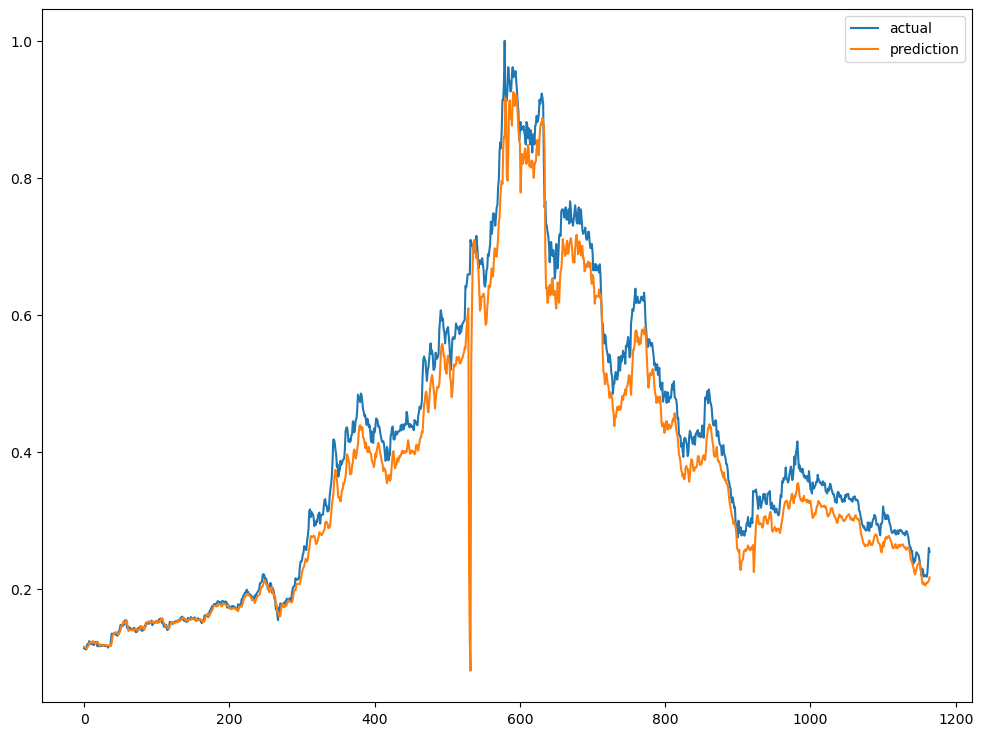

In [261]:
plt.figure(figsize=(12, 9))
plt.plot(ytest, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [262]:
pred
#scaler 적용된 값


array([[0.11496105],
       [0.11435249],
       [0.1137206 ],
       ...,
       [0.20975411],
       [0.21180005],
       [0.21625136]], dtype=float32)

In [264]:
#다시 원래 값으로 되돌리기 가능
scaler.inverse_transform

<bound method MinMaxScaler.inverse_transform of MinMaxScaler()>

In [323]:
df = pd.DataFrame(scaled, columns=cols)                            
xtrain,xtest,ytrain,ytest = train_test_split(df.drop("Close",axis = 1),df['Close'], test_size=0.2, random_state=0, shuffle=False)
vsta = np.hstack([xtest[20:],pred])
ans = scaler.inverse_transform(vsta)
ans[:,1]


array([20272., 20270., 20172., ..., 41550., 44700., 44750.])

https://wikidocs.net/22886
timesteps 기간
input_dim 입력 데이터의 각 차원의 크기
input_shape 입력 데이터의 전체 형태
 
 
예시)
 문장 생성 모델 만드는데
 10억개 문장이 있음
 10억개의 문장 데이터셋을 훈련시켜서 문장 생성 모델을 만드려고함
 30개의 문장을 가지고 학습하려고 한다
 
 30개 문장 입력 -> 다음 문장 생성
 
 10억개 문장은 50만개의 단어로 이루어져있음
 
 이런 경우에 input_shape(30,50만)
 
 하나의 문장에는 50만 차원의 벡터가 들어감
 
 
 
 hidden_units 몇차원으로 출력할 건지 입력(생략가능)
 
  batch_size는 한 번에 학습하는 데이터의 개수
  
  
  return_sequences 
  
  
  3D 텐서(배치크기,타임스텝,입력차원)
  
  
  
  
   메모리 셀의 최종 시점의 은닉 상태만을 리턴하고자 한다면 (batch_size, output_dim) 크기의 2D 텐서를 리턴
 [16,3,4]
 
 output_dim은 앞서 코드에서 정의한 hidden_units의 값으로 설정
 
 output_dim 10 ->10으로 출력
 
 return_sequences=True를 선택하면 메모리 셀이 모든 시점(time step)에 대해서 은닉 상태값을 출력
 return_sequences=False로 선택할 경우에는 메모리 셀은 하나의 은닉 상태값만을 출력
 예)번역기 경우 return_sequences=True로 설정
 긍정 부정의 경우 return_sequences=False로 설정
 

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
import numpy as np

timesteps = 10 #timesteps는 시점의 수
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))


# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [43]:
inputs #각 행이 rnn cell로 간다

array([[0.28989913, 0.21571933, 0.1572257 , 0.69263395],
       [0.60074413, 0.90801429, 0.30089142, 0.1798308 ],
       [0.82291122, 0.44608801, 0.42204471, 0.82770275],
       [0.36679514, 0.18480198, 0.90495863, 0.98743013],
       [0.9730211 , 0.64771893, 0.34140924, 0.03201002],
       [0.2601154 , 0.79951972, 0.6086827 , 0.57228101],
       [0.73002705, 0.67666949, 0.87597602, 0.33519857],
       [0.87671965, 0.12983926, 0.91035002, 0.90562372],
       [0.66509163, 0.1089868 , 0.07383016, 0.01409342],
       [0.62053422, 0.54338297, 0.27098681, 0.1318611 ]])

In [44]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [1]:
'''
timesteps = 10 
input_dim = 4
hidden_units = 8

'''







'\ntimesteps = 10 \ninput_dim = 4\nhidden_units = 8\n\n'

https://wikidocs.net/22886
2. 케라스(Keras)로 RNN 구현하기

https://keras.io/search.html?query=simple%20rnn

hidden_units = 은닉 상태의 크기를 정의. 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일. RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가진다.
timesteps = 입력 시퀀스의 길이(input_length)라고 표현하기도 함. 시점의 수.
input_dim = 입력의 크기.


RNN 층은 (batch_size, timesteps, input_dim) 크기의 3D 텐서를 입력으로 받습니다.
batch_size는 한 번에 학습하는 데이터의 개수

예)일주일동안의 주가를 예측한다 ->timestep은 7이 된다.



4. 깊은 순환 신경망(Deep Recurrent Neural Network)


model = Sequential()
model.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_units, return_sequences=True))


입력 x데이터가 5개 (input_dim=5)
x의 개수 10 (input_length=10)

깊은 순환 신경망을 사용하는 경우:복잡한 것을 설계할 때
    예)주식 입력 차원 5개라면 개만 가지고는 예측하기 어려우나
    그 위에 층을 더 쌓아서 설계함
    
    
    
    
    

5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)
양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다. 
첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States) 를 전달받아 
현재의 은닉 상태를 계산합니다. 위의 그림에서는 주황색 메모리 셀에 해당됩니다. 
두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 
앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States) 를 전달 받아 
현재의 은닉 상태를 계산합니다. 입력 시퀀스를 반대 방향으로 읽는 것입니다. 

은닉층이 2개인 깊은(deep) 양방향 순환 신경망의 모습도 있다


08-05 RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)


코퍼스:특정 분야에 대한 언어 집합
    
    
    
08-06 RNN을 이용한 텍스트 생성(Text Generation using RNN)

x 입력단어 y출력단어   ->나누는 작업 먼저 해야함




In [65]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
#pad_sequences -> padding하는 것 (채우는 것)


In [66]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [67]:
text

'경마장에 있는 말이 뛰고 있다\n\n그의 말이 법이다\n\n가는 말이 고와야 오는 말이 곱다\n'

In [68]:
print(text)

경마장에 있는 말이 뛰고 있다

그의 말이 법이다

가는 말이 고와야 오는 말이 곱다



In [69]:
tokenizer = Tokenizer() # Tokenizer 객체생성
tokenizer.fit_on_texts([text]) # 
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [70]:
tokenizer = Tokenizer() 

In [71]:
tokenizer.fit_on_texts([text]) #text라는 코퍼스로부터 학습

In [72]:
tokenizer.index_word

{1: '말이',
 2: '경마장에',
 3: '있는',
 4: '뛰고',
 5: '있다',
 6: '그의',
 7: '법이다',
 8: '가는',
 9: '고와야',
 10: '오는',
 11: '곱다'}

In [73]:
tokenizer.word_index #word가 키가 됨

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [74]:
text.split('\n')

['경마장에 있는 말이 뛰고 있다', '', '그의 말이 법이다', '', '가는 말이 고와야 오는 말이 곱다', '']

In [89]:
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)): #[2, 3, 1, 4, 5] ->range(1,5)
        sequence = encoded[:i+1] #[2,3] ->[2,3,1] ->[2,3,1,4]->[2, 3, 1, 4, 5]
        sequences.append(sequence) #[[2,3],[2,3,1],[2,3,1,4],[2, 3, 1, 4, 5]]

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [90]:
sequences
#학습하고자 하는 데이터셋
#마지막이 타겟 단어
#나머지는 입력 단어
#입력길이 직접 설정


[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [91]:
1	경마장에	있는
2	경마장에 있는	말이
3	경마장에 있는 말이	뛰고
4	경마장에 있는 말이 뛰고	있다

SyntaxError: invalid syntax (2222450254.py, line 1)

In [92]:
tokenizer.texts_to_sequences(['경마장에 있는 말이 뛰고 있다']) 
#문장을 구성하는 각각의 단어들에 대해 tokenizer.word_index에 따라 숫자로 변환하는 작업을 했다.
#숫자로 변환한 이유:rnn사용 위해

[[2, 3, 1, 4, 5]]

In [93]:
tokenizer.word_index

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [94]:
tokenizer.texts_to_sequences(['경마장에 있는 말이 뛰고 있다']) [0]
#리스트 이중구조를 1차원 구조로 변경

[2, 3, 1, 4, 5]

In [95]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len)) #길이 맞춰야 하기 때문에 확인

샘플의 최대 길이 : 6


In [96]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre') #길이맞추기

In [97]:
sequences
#앞쪽 줄 5개 x데이터
#맨 마지막 y데이터

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [98]:
#sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
#post로 주면 앞쪽으로 순서 바뀜


In [100]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]
#앞쪽 줄 5개 x데이터,
#맨 마지막 y데이터 데이터 나눔

In [105]:
X

array([[ 0,  0,  0,  0,  2],
       [ 0,  0,  0,  2,  3],
       [ 0,  0,  2,  3,  1],
       [ 0,  2,  3,  1,  4],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  8],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  8,  1,  9],
       [ 0,  8,  1,  9, 10],
       [ 8,  1,  9, 10,  1]])

In [106]:
y

array([ 3,  1,  4,  5,  1,  7,  1,  9, 10,  1, 11])

In [107]:
y = to_categorical(y, num_classes=vocab_size)

In [108]:
y
#정답

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [110]:
embedding_dim = 10 
#임베딩 차원이 10 ->
#임베딩? 단어를 벡터공간에 표현하는 것
#임베딩 벡터 공간: 11차원(단어의 종류 개수)
#vocab_size = len(tokenizer.word_index) + 1 로 설정했었음
#임베딩 벡터 공간: 11차원(단어의 종류 개수)+1=12차원
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
#12차원 데이터를 10차원 공간 데이터로 표현해라
#차원축소같은 느낌
#지금은 축소 안해도 되는데 예를 들어서 함
#원래는 학습속도를 개선하기 위해 사용한다
#임베딩 하면 원핫인코딩 형태가 축소되어 실수 형태로 표현된다 예)00010000 -> [1.3,-1.1,-0.3....]
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax')) #vocab_size 12차원
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)


Epoch 1/200
1/1 - 1s - loss: 2.5158 - accuracy: 0.1818 - 984ms/epoch - 984ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4997 - accuracy: 0.1818 - 5ms/epoch - 5ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4843 - accuracy: 0.1818 - 5ms/epoch - 5ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4695 - accuracy: 0.1818 - 3ms/epoch - 3ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4550 - accuracy: 0.1818 - 3ms/epoch - 3ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4409 - accuracy: 0.1818 - 1ms/epoch - 1ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4269 - accuracy: 0.4545 - 6ms/epoch - 6ms/step
Epoch 8/200
1/1 - 0s - loss: 2.4128 - accuracy: 0.4545 - 3ms/epoch - 3ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3985 - accuracy: 0.5455 - 3ms/epoch - 3ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3840 - accuracy: 0.4545 - 3ms/epoch - 3ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3689 - accuracy: 0.4545 - 3ms/epoch - 3ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3532 - accuracy: 0.4545 - 3ms/epoch - 3ms/step
Epoch 13/200
1/1 - 0s - loss: 2.3368 - accuracy: 0.4545 -

Epoch 106/200
1/1 - 0s - loss: 0.7721 - accuracy: 0.8182 - 3ms/epoch - 3ms/step
Epoch 107/200
1/1 - 0s - loss: 0.7590 - accuracy: 0.8182 - 3ms/epoch - 3ms/step
Epoch 108/200
1/1 - 0s - loss: 0.7459 - accuracy: 0.8182 - 2ms/epoch - 2ms/step
Epoch 109/200
1/1 - 0s - loss: 0.7330 - accuracy: 0.8182 - 0s/epoch - 0s/step
Epoch 110/200
1/1 - 0s - loss: 0.7203 - accuracy: 0.8182 - 9ms/epoch - 9ms/step
Epoch 111/200
1/1 - 0s - loss: 0.7077 - accuracy: 0.8182 - 3ms/epoch - 3ms/step
Epoch 112/200
1/1 - 0s - loss: 0.6952 - accuracy: 0.8182 - 0s/epoch - 0s/step
Epoch 113/200
1/1 - 0s - loss: 0.6829 - accuracy: 0.9091 - 0s/epoch - 0s/step
Epoch 114/200
1/1 - 0s - loss: 0.6708 - accuracy: 0.9091 - 0s/epoch - 0s/step
Epoch 115/200
1/1 - 0s - loss: 0.6587 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 116/200
1/1 - 0s - loss: 0.6469 - accuracy: 0.9091 - 0s/epoch - 0s/step
Epoch 117/200
1/1 - 0s - loss: 0.6351 - accuracy: 0.9091 - 0s/epoch - 0s/step
Epoch 118/200
1/1 - 0s - loss: 0.6236 - accuracy: 0.

In [133]:
tokenizer.texts_to_sequences(['가는'])[0]

[8]

In [144]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]  
        #[8],가는
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [145]:
print(sentence_generation(model, tokenizer, '경마장에', 4))
# sentence_generation ->4개 단어 생성해라
#6개 이상 단어도 출력 가능
#일반적 언어에서는 언어 초과하면 에러나지만 rnn에서는 가능

경마장에 있는 말이 뛰고 있다


In [131]:
print(sentence_generation(model, tokenizer, '가는', 3))

가는 말이 고와야 오는


rnn의 한계

맨 앞에 오는 단어 오는 것 아니면 제대로 안옴
예)'말이' 입력 ->이상하게나옴
중간에 있는 단어 입력하면 출력이 일관성있지 못하게 나온다


실제 텍스트 데이터로 해보기

In [146]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [147]:
df = pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [150]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [152]:
print(df['headline'].isnull().values.any())
#headline열에 null이 있는지 여부

False


In [153]:
df.headline

0       Former N.F.L. Cheerleaders’ Settlement Offer: ...
1       E.P.A. to Unveil a New Rule. Its Effect: Less ...
2                                 The New Noma, Explained
3                                                 Unknown
4                                                 Unknown
                              ...                        
1319    This Common Question Reinforces the Gender Pay...
1320                                   Anna, Llama and Me
1321           Gen. Michael Hayden Has One Regret: Russia
1322                         There Is Nothin’ Like a Tune
1323                                              Unknown
Name: headline, Length: 1324, dtype: object

In [158]:
headline=[]

In [160]:
headline.extend(list(df.headline.values))

In [161]:
headline

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Unknown',
 'Unknown',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'Unknown',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafa

In [163]:
print('총 샘플의 개수 : {}'.format(len(headline)))

총 샘플의 개수 : 1324


In [164]:
headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

노이즈값 제거 후 샘플의 개수 : 1214


In [165]:
headline

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafaring Past, and Muddied Its Future',
 'A Quote Disproved',
 'Hot Stuff Turns Cold',
 'At the Top,

In [166]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()
#punctuation 아까 임포트한 것. 특수문자들 들어가있음
#
preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [167]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [168]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [169]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'for': 6,
 'and': 7,
 'is': 8,
 'on': 9,
 'with': 10,
 'trump': 11,
 'as': 12,
 'at': 13,
 'new': 14,
 'how': 15,
 'from': 16,
 'it': 17,
 'an': 18,
 'that': 19,
 'be': 20,
 'season': 21,
 'us': 22,
 'you': 23,
 'its': 24,
 'what': 25,
 'episode': 26,
 'can': 27,
 'your': 28,
 'not': 29,
 'he': 30,
 'now': 31,
 'his': 32,
 'are': 33,
 'teaching': 34,
 'war': 35,
 'out': 36,
 'no': 37,
 'was': 38,
 'by': 39,
 'trumps': 40,
 'has': 41,
 'over': 42,
 'may': 43,
 'into': 44,
 'why': 45,
 'more': 46,
 'we': 47,
 'who': 48,
 'about': 49,
 'recap': 50,
 'activities': 51,
 '1': 52,
 'just': 53,
 'do': 54,
 'women': 55,
 'when': 56,
 'syria': 57,
 'trade': 58,
 'i': 59,
 '2': 60,
 'or': 61,
 'will': 62,
 'this': 63,
 'have': 64,
 'president': 65,
 'but': 66,
 'home': 67,
 'up': 68,
 'long': 69,
 'one': 70,
 'off': 71,
 'facebook': 72,
 'house': 73,
 'gop': 74,
 'our': 75,
 'case': 76,
 'they': 77,
 'life': 78,
 'end': 79,
 'right': 80,
 'some':

In [170]:
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [171]:
index_to_word = {}
for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

In [172]:
index_to_word

{1: 'the',
 2: 'a',
 3: 'to',
 4: 'of',
 5: 'in',
 6: 'for',
 7: 'and',
 8: 'is',
 9: 'on',
 10: 'with',
 11: 'trump',
 12: 'as',
 13: 'at',
 14: 'new',
 15: 'how',
 16: 'from',
 17: 'it',
 18: 'an',
 19: 'that',
 20: 'be',
 21: 'season',
 22: 'us',
 23: 'you',
 24: 'its',
 25: 'what',
 26: 'episode',
 27: 'can',
 28: 'your',
 29: 'not',
 30: 'he',
 31: 'now',
 32: 'his',
 33: 'are',
 34: 'teaching',
 35: 'war',
 36: 'out',
 37: 'no',
 38: 'was',
 39: 'by',
 40: 'trumps',
 41: 'has',
 42: 'over',
 43: 'may',
 44: 'into',
 45: 'why',
 46: 'more',
 47: 'we',
 48: 'who',
 49: 'about',
 50: 'recap',
 51: 'activities',
 52: '1',
 53: 'just',
 54: 'do',
 55: 'women',
 56: 'when',
 57: 'syria',
 58: 'trade',
 59: 'i',
 60: '2',
 61: 'or',
 62: 'will',
 63: 'this',
 64: 'have',
 65: 'president',
 66: 'but',
 67: 'home',
 68: 'up',
 69: 'long',
 70: 'one',
 71: 'off',
 72: 'facebook',
 73: 'house',
 74: 'gop',
 75: 'our',
 76: 'case',
 77: 'they',
 78: 'life',
 79: 'end',
 80: 'right',
 81: 'so

In [174]:
sequences

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3],
 [100, 3, 1117],
 [100, 3, 1117, 2],
 [100, 3, 1117, 2, 14],
 [100, 3, 1117, 2, 14, 583],
 [100, 3, 1117, 2, 14, 583, 24],
 [100, 3, 1117, 2, 14, 583, 24, 1118],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374, 5],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374, 5, 1119],
 [1, 14],
 [1, 14, 1120],
 [1, 14, 1120, 1121],
 [15, 2],
 [15, 2, 584],
 [15, 2, 584, 4],
 [15, 2, 584, 4, 215],
 [15, 2, 584, 4, 215, 375],
 [15, 2, 584, 4, 215, 375, 1122],
 [15, 2, 584, 4, 215, 375, 1122, 2],
 [15, 2, 584, 4, 215, 375, 1122, 2, 376],
 [15, 2, 584, 4, 215, 375, 1122, 2, 376, 

In [175]:
len(sequences)

7803

In [177]:
#이제 input length의 길이 정해야함

In [178]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 24


In [179]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [180]:
sequences

array([[   0,    0,    0, ...,    0,   99,  269],
       [   0,    0,    0, ...,   99,  269,  371],
       [   0,    0,    0, ...,  269,  371, 1115],
       ...,
       [   0,    0,    0, ...,    8, 3493,  115],
       [   0,    0,    0, ..., 3493,  115,    2],
       [   0,    0,    0, ...,  115,    2, 1025]])

In [182]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]
#훈련할 때 array로 넣어줘야함

In [194]:
X

array([[   0,    0,    0, ...,    0,    0,   99],
       [   0,    0,    0, ...,    0,   99,  269],
       [   0,    0,    0, ...,   99,  269,  371],
       ...,
       [   0,    0,    0, ...,  170,    8, 3493],
       [   0,    0,    0, ...,    8, 3493,  115],
       [   0,    0,    0, ..., 3493,  115,    2]])

In [184]:
y

array([ 269,  371, 1115, ...,  115,    2, 1025])

In [185]:
#y 원핫인코딩ㅇ하기
#원핫인코딩의 크기는 3494 차원으로 예측해야함
vocab_size
#ex) 1025 -> 0000...000001000...00 (3494개)

3494

In [186]:
y = to_categorical(y, num_classes=vocab_size)

In [192]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [199]:
y.shape 



#7803개 훈련 문장에 대한 정답에 해당되는 7803개의 단어
#각 단어는 3494차원으로 원핫인코딩 되어있음

(7803, 3494)

timestep = 23

dim ? 3494 차원

y예측값 3494 차원 ->합은 1(소프트맥스 확률이므로)

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [196]:
embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) #3494차원->10차원
model.add(LSTM(hidden_units)) #lstm셀 출력:128차원
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 5s - loss: 7.6458 - accuracy: 0.0309 - 5s/epoch - 21ms/step
Epoch 2/200
244/244 - 3s - loss: 7.1169 - accuracy: 0.0296 - 3s/epoch - 11ms/step
Epoch 3/200
244/244 - 3s - loss: 6.9805 - accuracy: 0.0326 - 3s/epoch - 11ms/step
Epoch 4/200
244/244 - 3s - loss: 6.8491 - accuracy: 0.0387 - 3s/epoch - 11ms/step
Epoch 5/200
244/244 - 3s - loss: 6.6867 - accuracy: 0.0450 - 3s/epoch - 11ms/step
Epoch 6/200
244/244 - 3s - loss: 6.5038 - accuracy: 0.0455 - 3s/epoch - 11ms/step
Epoch 7/200
244/244 - 3s - loss: 6.3092 - accuracy: 0.0543 - 3s/epoch - 11ms/step
Epoch 8/200
244/244 - 3s - loss: 6.1081 - accuracy: 0.0590 - 3s/epoch - 11ms/step
Epoch 9/200
244/244 - 3s - loss: 5.9115 - accuracy: 0.0615 - 3s/epoch - 11ms/step
Epoch 10/200
244/244 - 3s - loss: 5.7233 - accuracy: 0.0682 - 3s/epoch - 11ms/step
Epoch 11/200
244/244 - 3s - loss: 5.5497 - accuracy: 0.0716 - 3s/epoch - 11ms/step
Epoch 12/200
244/244 - 3s - loss: 5.3848 - accuracy: 0.0759 - 3s/epoch - 11ms/step
Epoch 13/200


Epoch 100/200
244/244 - 3s - loss: 0.6088 - accuracy: 0.8799 - 3s/epoch - 12ms/step
Epoch 101/200
244/244 - 3s - loss: 0.5954 - accuracy: 0.8790 - 3s/epoch - 12ms/step
Epoch 102/200
244/244 - 3s - loss: 0.5848 - accuracy: 0.8815 - 3s/epoch - 12ms/step
Epoch 103/200
244/244 - 3s - loss: 0.5706 - accuracy: 0.8852 - 3s/epoch - 12ms/step
Epoch 104/200
244/244 - 3s - loss: 0.5595 - accuracy: 0.8890 - 3s/epoch - 12ms/step
Epoch 105/200
244/244 - 3s - loss: 0.5462 - accuracy: 0.8881 - 3s/epoch - 12ms/step
Epoch 106/200
244/244 - 3s - loss: 0.5354 - accuracy: 0.8916 - 3s/epoch - 12ms/step
Epoch 107/200
244/244 - 3s - loss: 0.5231 - accuracy: 0.8918 - 3s/epoch - 12ms/step
Epoch 108/200
244/244 - 3s - loss: 0.5162 - accuracy: 0.8952 - 3s/epoch - 12ms/step
Epoch 109/200
244/244 - 3s - loss: 0.5072 - accuracy: 0.8958 - 3s/epoch - 12ms/step
Epoch 110/200
244/244 - 3s - loss: 0.4944 - accuracy: 0.8966 - 3s/epoch - 12ms/step
Epoch 111/200
244/244 - 3s - loss: 0.4839 - accuracy: 0.8970 - 3s/epoch - 12

Epoch 198/200
244/244 - 3s - loss: 0.2614 - accuracy: 0.9166 - 3s/epoch - 12ms/step
Epoch 199/200
244/244 - 3s - loss: 0.2611 - accuracy: 0.9163 - 3s/epoch - 12ms/step
Epoch 200/200
244/244 - 3s - loss: 0.2608 - accuracy: 0.9161 - 3s/epoch - 12ms/step


In [197]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [ ]:
print(sentence_generation(model, tokenizer, 'i', 10))

In [ ]:
print(sentence_generation(model, tokenizer, 'how', 10))